# Decision Tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Hierarchy of if/else questions >>>> final decision
Tree has no ability to generate new responses, outside of what seen in the training data
Control complexity: pre-prunning parameters (max_depth, max_leaf_nodes, min_samples_leaf)
Resulting model easily visualized
There is no need of scaling of the data(invariant)
Tend to overfit and provide poor generalization
The algorithm searches over all possible tests and finds the one that is most informative about the target variable

In [91]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
import plotly.express as px

# Introduction

**1. Gini Impurity**

Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.

$$GI=\sum_{i=1}^J p(i) * (1 - p(i))$$

Gini impurity is lower bounded by 0, with 0 occurring if the data set contains only one class.

In [92]:
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
def gini(target):
#     labels = labels.values.reshape(-1,1)
#     GI = 0
#     for i in np.unique(labels):
#         p = sum(labels==i)/len(labels)
#         GI += p*(1 - p)
#     return GI[0]
    p = target.value_counts(normalize=True) # Series com as proporções pk
    IG = p.dot(1-p)                  # Soma de pk*(1-pk) 
    return IG

**2. Entropy**

Entropy is nothing but the measure of disorder

$$E = -\sum_{k\in K}{p_k \log{p_k}}$$

Entropy is measured between 0 and 1.(Depending on the number of classes in your dataset, entropy can be greater than 1 but it means the same thing , a very high level of disorder. For the sake of simplicity, the examples in this blog will have entropy between 0 and 1).

In [94]:
def entropy(target):
#     labels = labels.values.reshape(-1,1)
#     E = 0
#     for i in np.unique(labels):
#         p = sum(labels==i)/len(labels)
#         E += - p*np.log(p)
#     return E[0]

  # c: um conjunto de variáveis targets
  
    p = target.value_counts(normalize=True) # Series com as proporções pk
    E = -p.dot(np.log(p))                  # Soma de -pk*log(pk) 
    return E

**2. Entropy/ Gini Gain**

Gini gain is calculated when building a decision tree to help determine which attribute gives us the most information about which class a new data point belongs to.

The main objectif is to decrease the entropy (aumentar ganho de informação) or the impurity (aumentar ganho de pureza)

$$GI_{f} = Pr_{r} GI_{r} + Pr_{l} GI_{l}$$

and

$$E_{f} = Pr_{r} E_{r} + Pr_{l} E_{l}$$

Where Pr represents the proportions of the split 
 
- increasing purity (decreasing impurity)
$$GP= GI_{i}-GI{f}$$ 

- decrease entropy
$$GI = E_{i}-E_{f}$$

In [95]:
# Back to iris dataset

X=pd.DataFrame(iris.data, columns= iris.feature_names)
y=pd.Series(iris.target)

In [96]:
gini(y)

0.6666666666666667

In [97]:
entropy(y)

1.0986122886681096

In [98]:
# --- considering only one feature ---

def eval_split(X,y,col, splt_val, metr):
    
    idl = X[col]<=splt_val
    idr = X[col]>splt_val
    
    X_l, y_l, X_r, y_r = X[idl], y[idl], X[idr], y[idr]
    
    Pr_l = X_l.shape[0]/X.shape[0]
    Pr_r = X_r.shape[0]/X.shape[0]
    
    G_i = metr(y)
    G_f= Pr_l*metr(y_l) + Pr_r*metr(y_r)
    
    return G_i - G_f
    

In [99]:
eval_split(X,y,X.columns[0],7, entropy)

0.09507606240626298

In [100]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [101]:
X.shape

(150, 4)

In [102]:
g_max=0
id=0
count=0


for col in X.columns:
    for i in np.arange(min(X[col]),max(X[col]),0.1):
#         print(col)
        count=count+1
        gain = eval_split(X,y,col,i, gini)

        if(gain>g_max):
            col_esc=col
            g_max=gain
            id=i
            print('---iteration: {} | gain: {:.3f}, best split:{:.3f}, dimension split:{}\n'
                  .format(count,gain,i, col))
            
            
print('max gain: {:.2f} split on X{}: {:.2f}\n'.format(g_max,col_esc, id))

---iteration: 1 | gain: 0.004, best split:4.300, dimension split:sepal length (cm)

---iteration: 3 | gain: 0.018, best split:4.500, dimension split:sepal length (cm)

---iteration: 4 | gain: 0.023, best split:4.600, dimension split:sepal length (cm)

---iteration: 5 | gain: 0.043, best split:4.700, dimension split:sepal length (cm)

---iteration: 6 | gain: 0.053, best split:4.800, dimension split:sepal length (cm)

---iteration: 7 | gain: 0.080, best split:4.900, dimension split:sepal length (cm)

---iteration: 8 | gain: 0.085, best split:5.000, dimension split:sepal length (cm)

---iteration: 9 | gain: 0.120, best split:5.100, dimension split:sepal length (cm)

---iteration: 10 | gain: 0.168, best split:5.200, dimension split:sepal length (cm)

---iteration: 11 | gain: 0.185, best split:5.300, dimension split:sepal length (cm)

---iteration: 12 | gain: 0.192, best split:5.400, dimension split:sepal length (cm)

---iteration: 13 | gain: 0.228, best split:5.500, dimension split:sepal l

(1.5, 5)

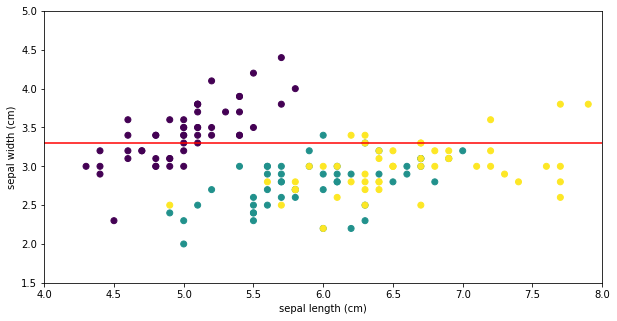

In [103]:
fig= plt.figure(figsize=(10,5))

plt.scatter(X.iloc[:,0], X.iloc[:,1], c= y);
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


line=np.arange(0,10)
plt.plot(line, np.ones(len(line))*3.3, c='r')
plt.xlim(4,8)
plt.ylim(1.5,5)



# Generating a Tree

In [104]:
class Tree:
    def __init__(self):
        self.left = None
        self.right = None
        self.info = None

In [105]:
def trainTree(tree_, X, y, crit):
        
    gain = 0

    for dim in X.columns:
        for datapoint in X[dim]:
            gain_aux = eval_split(X, y, dim, datapoint, crit)

            if gain_aux > gain:
                gain=gain_aux
                bestsplit=datapoint
                dimsplit=dim

            if gain > 0:
    #         if I have gain ---> my split provides less entropy or less gini impurity
                print('gain: {}, best split:{}, dimsplit:{}'.format(gain, bestsplit, dimsplit))
                idl = X[dimsplit]<=bestsplit
                idr = X[dimsplit]>bestsplit
                X_l, X_r, y_l, y_r = X[idl], X[idr], y[idl], y[idr]
                tree_.left = Tree()
                tree_.right = Tree()

                tree_.info = ["nó", dimsplit, datapoint]
                tree_.left = trainTree(tree_.left, X_l, y_l, crit)
                tree_.right = trainTree(tree_.right, X_r, y_r, crit)

            else:
                tree_.info = ["folha", y.value_counts(normalize=True)]

            return tree_


In [106]:
arvore=Tree()
arvore= trainTree(arvore, X, y, gini)

gain: 0.1684194823599613, best split:5.1, dimsplit:sepal length (cm)
gain: 0.08255912567718926, best split:5.4, dimsplit:sepal length (cm)
gain: 0.06286963765097875, best split:5.8, dimsplit:sepal length (cm)
gain: 0.05708655876143559, best split:7.0, dimsplit:sepal length (cm)


# CASE 01 - SOCIAL NETWORKS ADS

In [5]:
dataset=pd.read_csv(r"../Datasets/Social_Network_Ads.csv")

# # Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# # filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [68]:
classifier= DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [69]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:1.000
Test set score:0.910


In [70]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_F','MODEL_P'], index = ['DATA_F','DATA_P'])
df_confusion

,MODEL_F,MODEL_P
DATA_F,62,6
DATA_P,3,29


In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


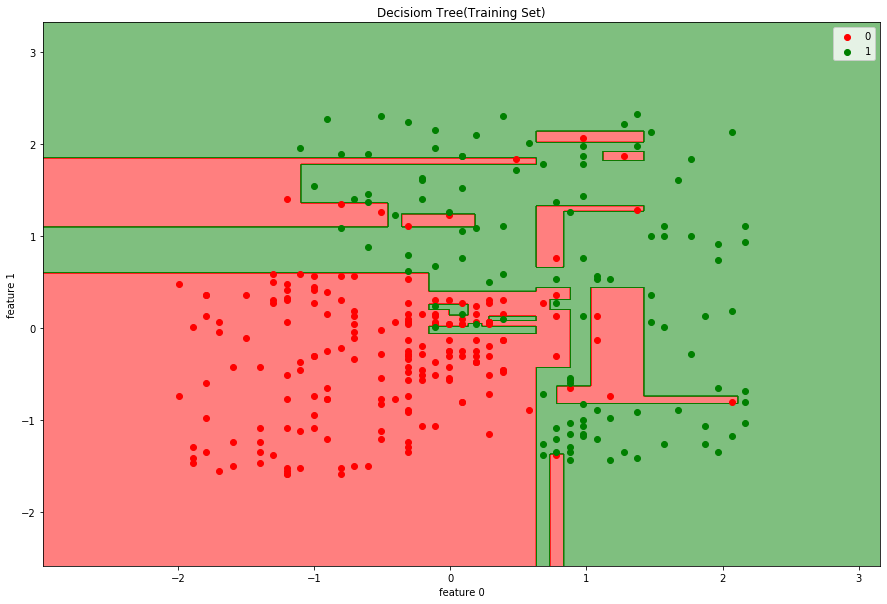

In [72]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Decisiom Tree(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


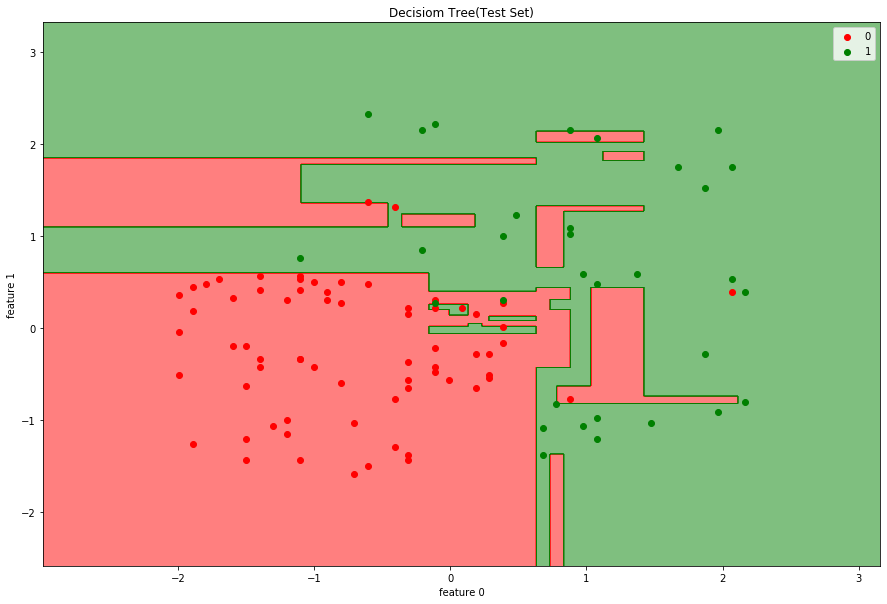

In [73]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Decisiom Tree(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

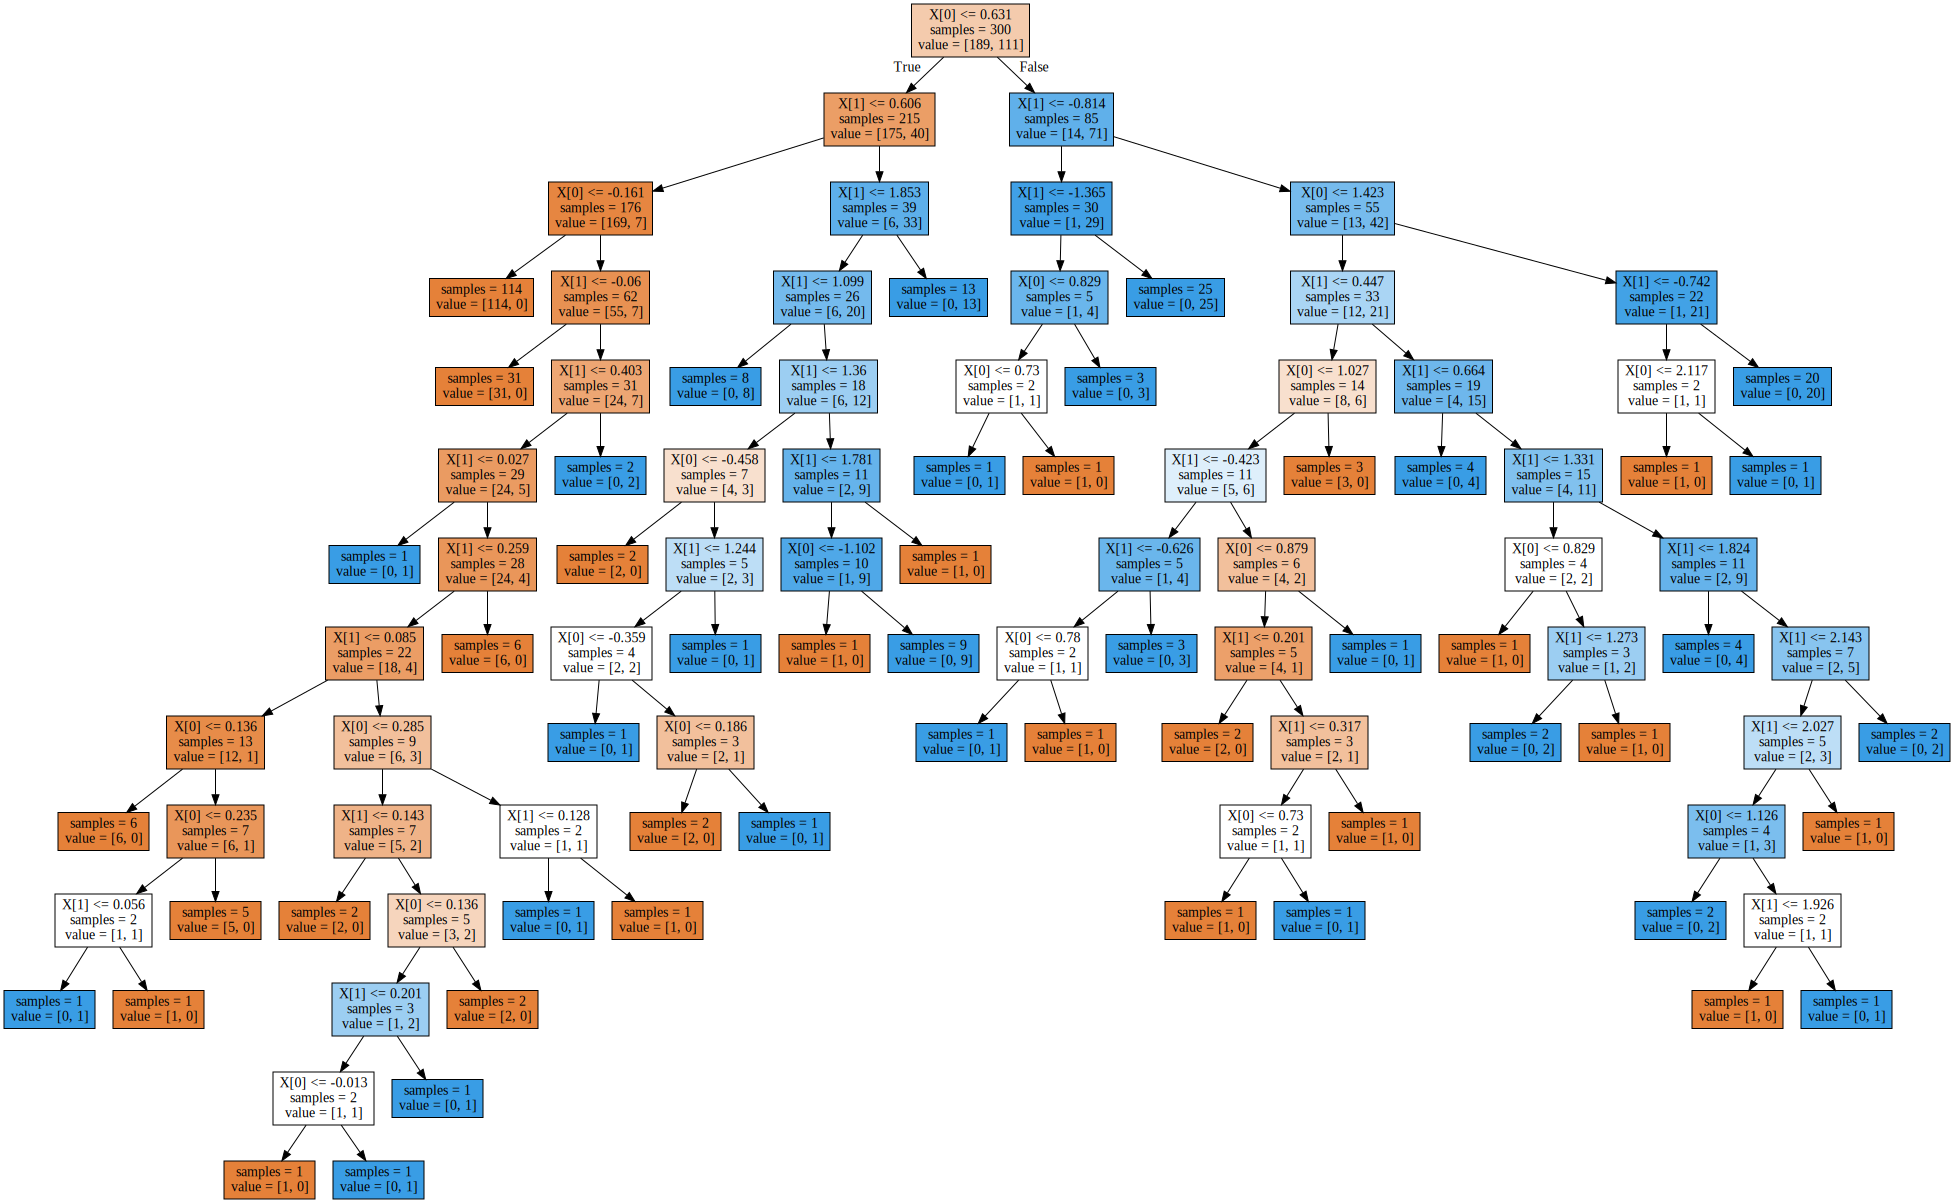

In [74]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(classifier, out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# CASE 02 - BREAST CANCER (SKLEARN DATASET) ANALYSIS

In [7]:
cancer= load_breast_cancer()

X_train, X_test, y_train, y_test= tts(cancer.data,cancer.target,stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(tree.score(X_train, y_train),tree.score(X_test, y_test)))

Training set score:1.000
Test set score:0.937


Fetures importances:[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
Training set score:1.000
Test set score:0.937


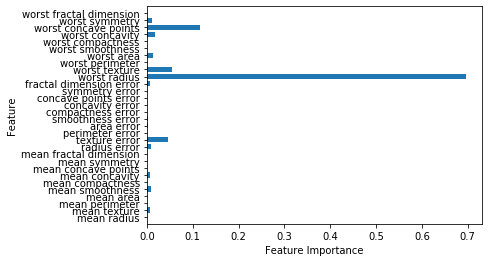

In [8]:
print ('Fetures importances:{}'.format(tree.feature_importances_))
np.sum(tree.feature_importances_)

def plot_feature_imp_cancer(model):
    
    n_features=cancer.data.shape[1]
    array_i=np.arange(n_features)
    plt.barh(array_i, model.feature_importances_, align='center')
    plt.yticks(array_i, cancer.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
    
plot_feature_imp_cancer(tree)

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(tree.score(X_train, y_train),tree.score(X_test, y_test)))

In [31]:
#EXTRA

# df = pd.DataFrame(np.hstack((np.random.random(size=(100, 4)),np.random.randint(0,2,size=(100, 1))))
#                   , columns=['x1','x2','x3','x4','y'])

In [1]:
# Regressão

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

#DATASET DE ENTRADA
boston = load_boston()
X=pd.DataFrame(boston.data, columns= iris.feature_names)
y=pd.Series(boston.target)

print('###DIMENSOES###')
print('X dimensões:{}'.format(X.shape))
print('y dimensões:{}'.format(y.shape))

# # Splitting training and testing
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0)
print('X_train dimensões:{}'.format(X_train.shape))
print('X_test dimensões:{}'.format(X_test.shape))

# Instantiate dt
regressor = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=8,
            random_state=3)

# Fit dt to the training set
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('\n###SCORE###')

# Compute mse_dt
mse_test= MSE(y_test, y_pred)
rmse_test=(mse_test)**(1/2)

mse_train= MSE(y_train,  regressor.predict(X_train))
rmse_train=(mse_train)**(1/2)
             
# # Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}\nRegression Tree train set RMSE: {:.2f} '.format(rmse_test,rmse_train))

# Evaluating using the 10-fold CV error

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = -cross_val_score(regressor, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE Regressor Tree using k=10 folds: {:.2f}'.format(RMSE_CV))

print('\n###ATRIBUTES###')
print('General Atributes:\ndepth: {}\nleaves : {}'.format(classifier.get_depth(),classifier.get_n_leaves()))

plot_feature_imp(regressor,boston)

NameError: name 'load_boston' is not defined